# Crime Prediction and Proactive Community Safety System
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade

## Project Overview

This project aims to predict monthly crime occurrences across various communities from 2018 to 2024 and provide actionable insights for proactive crime prevention. Using historical crime data, we will develop a robust, explainable neural network model to forecast future crime patterns and support strategic interventions.

The project focuses on three main objectives:

1. **Crime Prediction:** Build a predictive model that forecasts monthly crime counts per community and category.
2. **Insight Generation:** Analyze crime trends to identify high-risk communities and seasonal patterns.
3. **Proactive Intervention System:** Design an intelligent system that recommends targeted interventions, resource allocation, and early warnings for law enforcement.

---

## Project Workflow

The project is structured into the following steps:

### 1. Data Collection and Understanding
- Load the dataset containing `Community`, `Category`, `Crime Count`, `Year`, and `Month`.
- Understand the structure, distribution, and potential anomalies.

### 2. Data Preprocessing
- Handle missing values, duplicates, and inconsistencies.
- Generate temporal features such as lag values, rolling averages, and seasonality indicators.
- Encode categorical features (community and crime categories) for neural network compatibility.
- Normalize numerical features.

### 3. Exploratory Data Analysis (EDA)
- Visualize trends over time by community and category.
- Identify seasonal patterns, spikes, and anomalies.
- Analyze correlations between different crime categories.

### 4. Model Development
- Start with baseline models (historical averages, ARIMA) for reference.
- Develop advanced neural network models:
  - LSTM or GRU for temporal dependencies.
  - Embeddings for categorical features (community & category).
  - Optional: Transformer-based architecture for long-term trend prediction.
- Implement appropriate loss functions for count data (e.g., Poisson or MSE).

### 5. Model Evaluation
- Split data chronologically into training, validation, and test sets.
- Evaluate using metrics such as MAE, RMSE, and MAPE.
- Use explainability tools (SHAP, attention visualization) to interpret model predictions.

### 6. Deployment & System Integration
- Build a dashboard to visualize predictions and trends.
- Implement an alert system for high-risk communities or categories.
- Recommend resource allocation strategies to law enforcement.
- Monitor model performance and retrain periodically.

### 7. Industry Best Practices
- Ensure data privacy and compliance with regulations.
- Maintain model versioning, reproducibility, and robust documentation.
- Test system reliability under extreme or unexpected scenarios.

---

## Expected Outcomes
- Accurate monthly crime forecasts at the community and category level.
- Clear visualizations of crime trends and hotspots.
- Actionable recommendations for law enforcement and policymakers.
- A fully operational, explainable, and deployable system for proactive crime prevention.


In [1]:
# Environment Setup

# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, GRU, Dropout, Embedding, Concatenate, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Explainability
import shap

# Misc
import os
import random

# Global Settings

# Set random seeds for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Plotting aesthetics
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 6)

print("Environment setup complete. All libraries are loaded and ready.")


C:\Users\AKINMADE FARUQ\anaconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\AKINMADE FARUQ\anaconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\AKINMADE FARUQ\anaconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid co

Environment setup complete. All libraries are loaded and ready.


In [2]:
# Load Dataset and Initial Inspection

# Load the dataset
# Replace 'crime_data.csv' with the actual path to your dataset
dataset_path = "Community_Crime_Statistics_20240522.csv"
df = pd.read_csv(dataset_path)

# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Basic information about the dataset
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
display(df.describe())

# Unique values in categorical columns
print("\nUnique Values per Categorical Column:")
categorical_columns = ['Community', 'Category']
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")


First 5 rows of the dataset:


,Community,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,11
1,01B,Break & Enter - Commercial,1,2019,6
2,01B,Break & Enter - Commercial,1,2019,8
3,01B,Break & Enter - Commercial,2,2020,3
4,01B,Break & Enter - Commercial,2,2020,7



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70661 entries, 0 to 70660
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Community    70661 non-null  object
 1   Category     70661 non-null  object
 2   Crime Count  70661 non-null  int64 
 3   Year         70661 non-null  int64 
 4   Month        70661 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.7+ MB

Missing Values in Each Column:
Community      0
Category       0
Crime Count    0
Year           0
Month          0
dtype: int64

Summary Statistics for Numeric Columns:


,Crime Count,Year,Month
count,70661.000000,70661.000000,70661.000000
mean,2.855748,2020.618616,6.369242
std,3.664965,1.825330,3.451445
min,1.000000,2018.000000,1.000000
25%,1.000000,2019.000000,3.000000
50%,2.000000,2021.000000,6.000000
75%,3.000000,2022.000000,9.000000
max,111.000000,2024.000000,12.000000



Unique Values per Categorical Column:
Community: 296 unique values
Category: 9 unique values


In [3]:
# Data Preprocessing

# Copy dataset to avoid modifying original
data = df.copy()

# 1. Temporal Features
# Create 'Date' column for easier time series handling
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Sort by Community, Category, Date
data = data.sort_values(by=['Community', 'Category', 'Date']).reset_index(drop=True)

# Create lag features (previous month crime counts)
data['Crime_Lag_1'] = data.groupby(['Community', 'Category'])['Crime Count'].shift(1)
data['Crime_Lag_3'] = data.groupby(['Community', 'Category'])['Crime Count'].shift(3)
data['Crime_Lag_6'] = data.groupby(['Community', 'Category'])['Crime Count'].shift(6)

# Fill NaNs in lag features with 0 (or could use mean)
lag_features = ['Crime_Lag_1', 'Crime_Lag_3', 'Crime_Lag_6']
data[lag_features] = data[lag_features].fillna(0)

# 2. Seasonality / Time Features
# Month as cyclical features for seasonality
data['Month_sin'] = np.sin(2 * np.pi * data['Month']/12)
data['Month_cos'] = np.cos(2 * np.pi * data['Month']/12)

# 3. Categorical Encoding
# Encode 'Community' and 'Category' as integer labels
community_encoder = LabelEncoder()
category_encoder = LabelEncoder()

data['Community_enc'] = community_encoder.fit_transform(data['Community'])
data['Category_enc'] = category_encoder.fit_transform(data['Category'])

# 4. Scaling Numeric Features
scaler = StandardScaler()
numeric_features = ['Crime Count', 'Crime_Lag_1', 'Crime_Lag_3', 'Crime_Lag_6']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# 5. Final Dataset Check
print("Preprocessed data sample:")
display(data.head())

print("\nColumns in the dataset:")
print(data.columns)


Preprocessed data sample:


,Community,Category,Crime Count,Year,Month,Date,Crime_Lag_1,Crime_Lag_3,Crime_Lag_6,Month_sin,Month_cos,Community_enc,Category_enc
0,01B,Assault (Non-domestic),-0.506352,2022,11,2022-11-01,-0.761926,-0.729743,-0.685287,-5.000000e-01,8.660254e-01,0,0
1,01B,Break & Enter - Commercial,-0.506352,2019,6,2019-06-01,-0.761926,-0.729743,-0.685287,1.224647e-16,-1.000000e+00,0,1
2,01B,Break & Enter - Commercial,-0.506352,2019,8,2019-08-01,-0.490345,-0.729743,-0.685287,-8.660254e-01,-5.000000e-01,0,1
3,01B,Break & Enter - Commercial,-0.233496,2020,3,2020-03-01,-0.490345,-0.729743,-0.685287,1.000000e+00,6.123234e-17,0,1
4,01B,Break & Enter - Commercial,-0.233496,2020,7,2020-07-01,-0.218764,-0.460420,-0.685287,-5.000000e-01,-8.660254e-01,0,1



Columns in the dataset:
Index(['Community', 'Category', 'Crime Count', 'Year', 'Month', 'Date',
       'Crime_Lag_1', 'Crime_Lag_3', 'Crime_Lag_6', 'Month_sin', 'Month_cos',
       'Community_enc', 'Category_enc'],
      dtype='object')


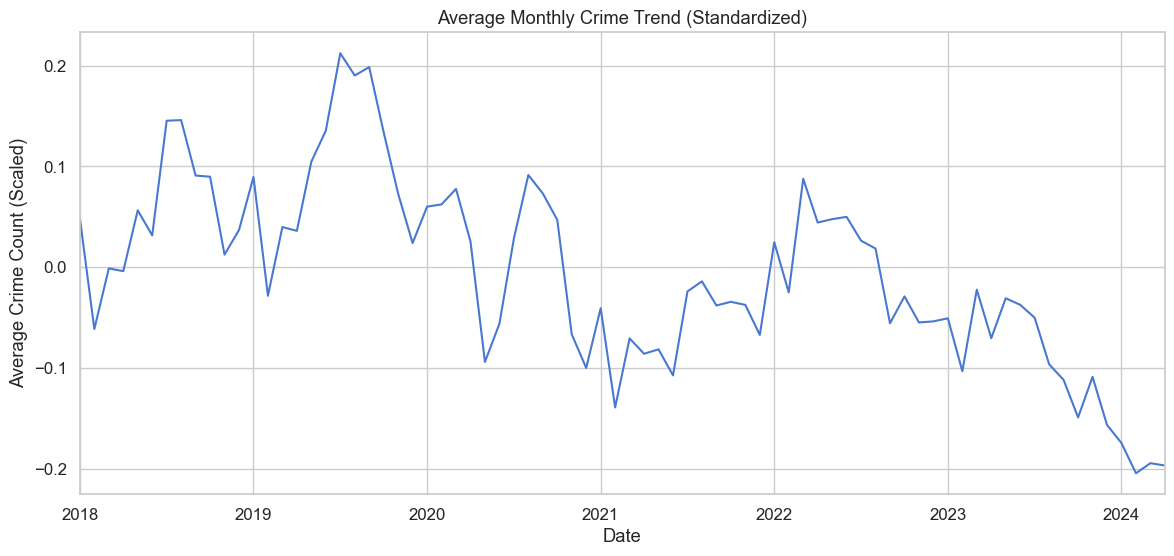

<Figure size 1400x600 with 0 Axes>

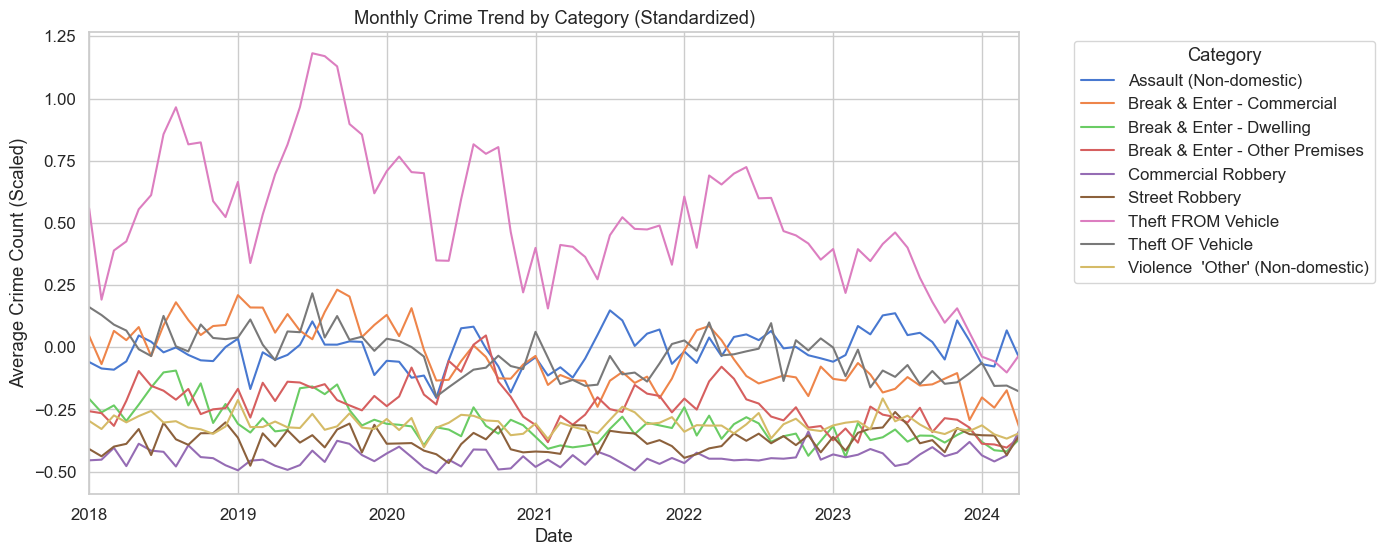

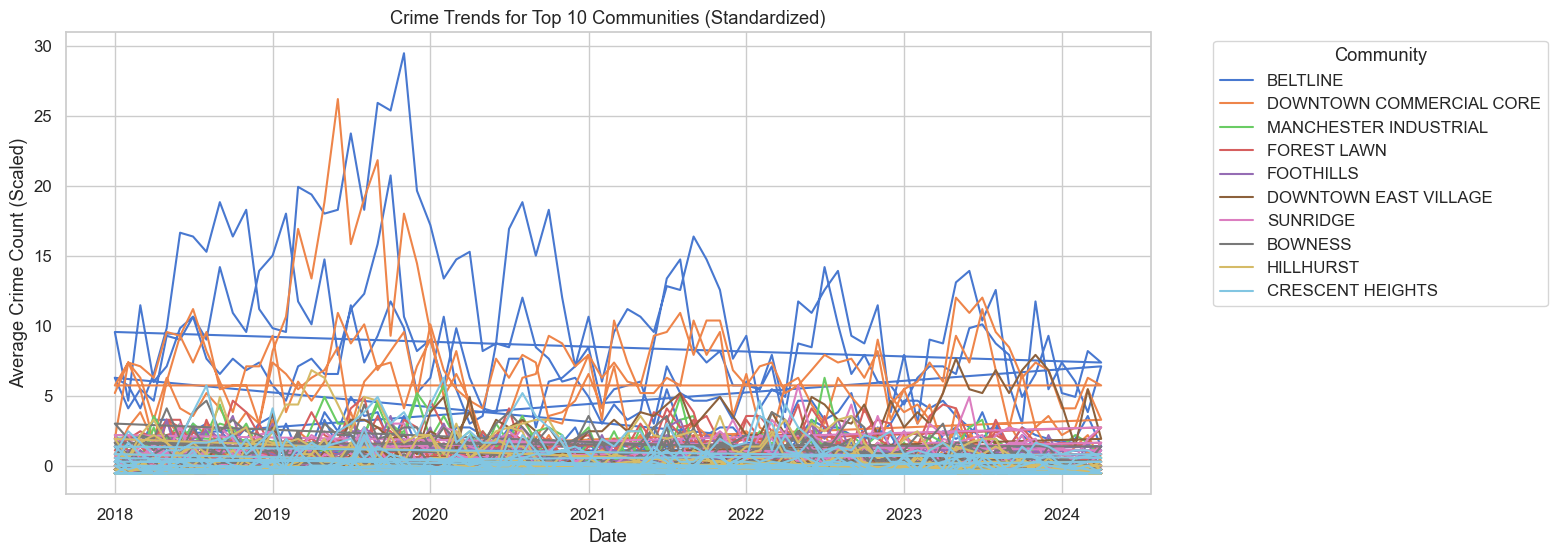

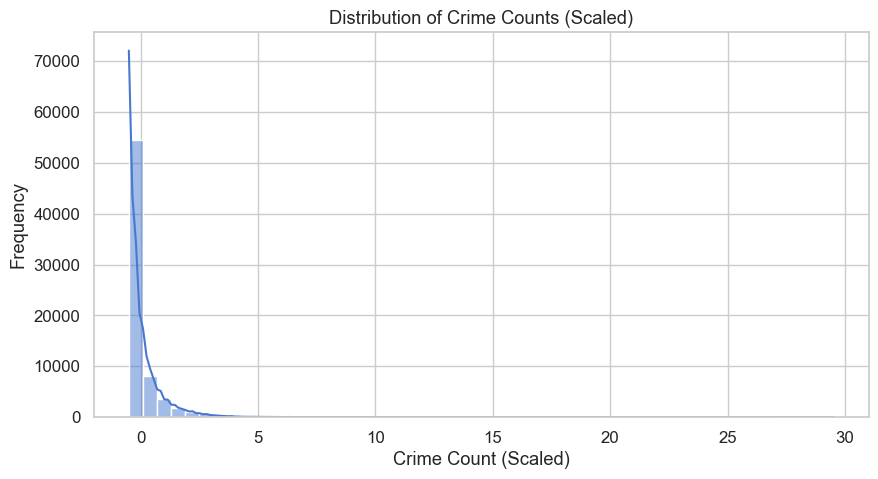

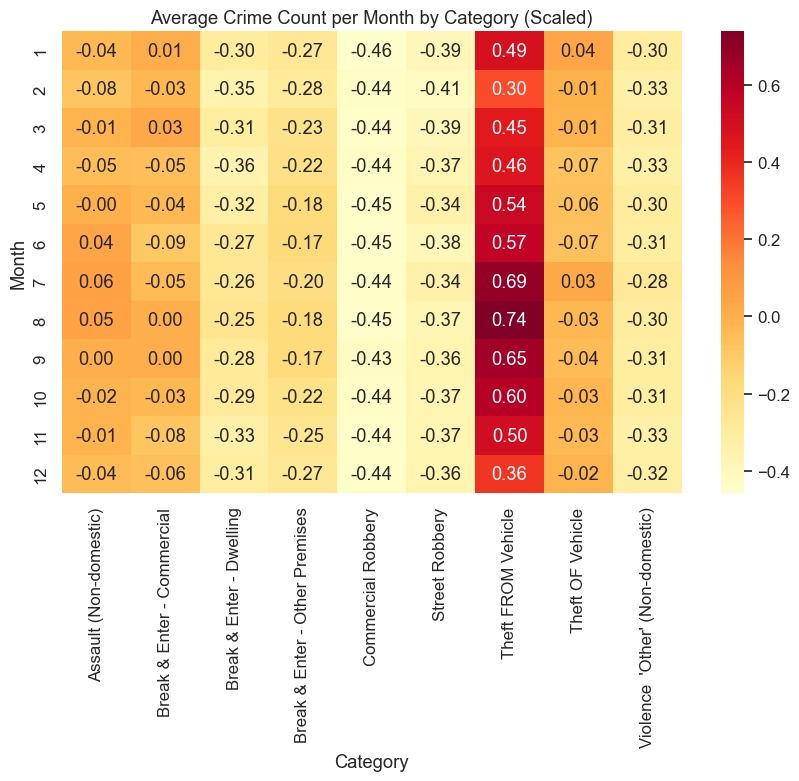

In [4]:
# Exploratory Data Analysis (EDA)

# 1. Overall crime trend over time
plt.figure(figsize=(14,6))
monthly_crime = data.groupby('Date')['Crime Count'].mean()
monthly_crime.plot()
plt.title("Average Monthly Crime Trend (Standardized)")
plt.xlabel("Date")
plt.ylabel("Average Crime Count (Scaled)")
plt.show()

# 2. Crime trends by Category
plt.figure(figsize=(14,6))
category_trend = data.groupby(['Date', 'Category'])['Crime Count'].mean().unstack()
category_trend.plot()
plt.title("Monthly Crime Trend by Category (Standardized)")
plt.xlabel("Date")
plt.ylabel("Average Crime Count (Scaled)")
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. Crime trends by Community (top 10 high-crime communities)
top_communities = data.groupby('Community')['Crime Count'].mean().sort_values(ascending=False).head(10).index
plt.figure(figsize=(14,6))
for community in top_communities:
    subset = data[data['Community'] == community]
    plt.plot(subset['Date'], subset['Crime Count'], label=community)
plt.title("Crime Trends for Top 10 Communities (Standardized)")
plt.xlabel("Date")
plt.ylabel("Average Crime Count (Scaled)")
plt.legend(title='Community', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 4. Crime Count distribution
plt.figure(figsize=(10,5))
sns.histplot(data['Crime Count'], bins=50, kde=True)
plt.title("Distribution of Crime Counts (Scaled)")
plt.xlabel("Crime Count (Scaled)")
plt.ylabel("Frequency")
plt.show()

# 5. Heatmap of monthly crime patterns (seasonality)
crime_pivot = data.pivot_table(index='Month', columns='Category', values='Crime Count', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(crime_pivot, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Average Crime Count per Month by Category (Scaled)")
plt.xlabel("Category")
plt.ylabel("Month")
plt.show()


C:\Users\AKINMADE FARUQ\AppData\Local\Temp\ipykernel_14080\1846916731.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")


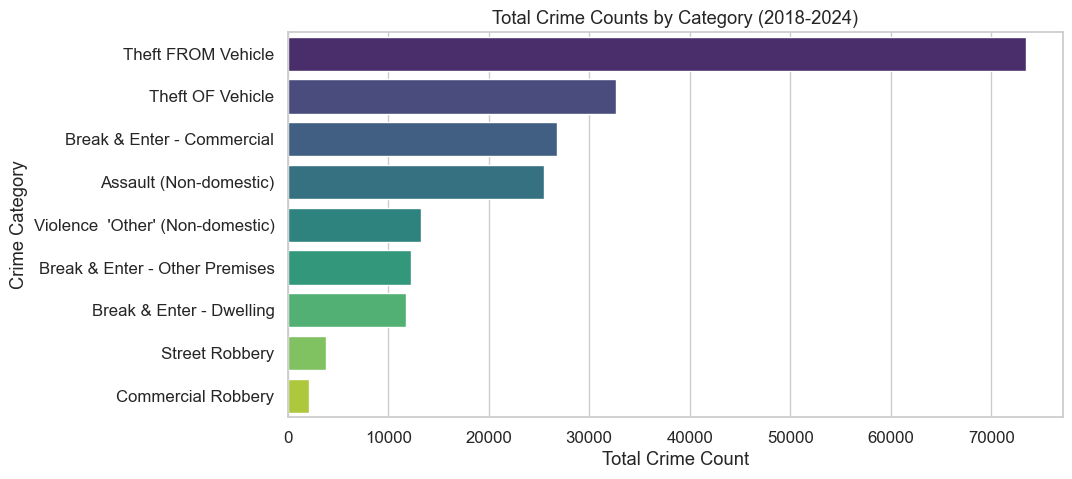

C:\Users\AKINMADE FARUQ\AppData\Local\Temp\ipykernel_14080\1846916731.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=community_counts.values, y=community_counts.index, palette="magma")


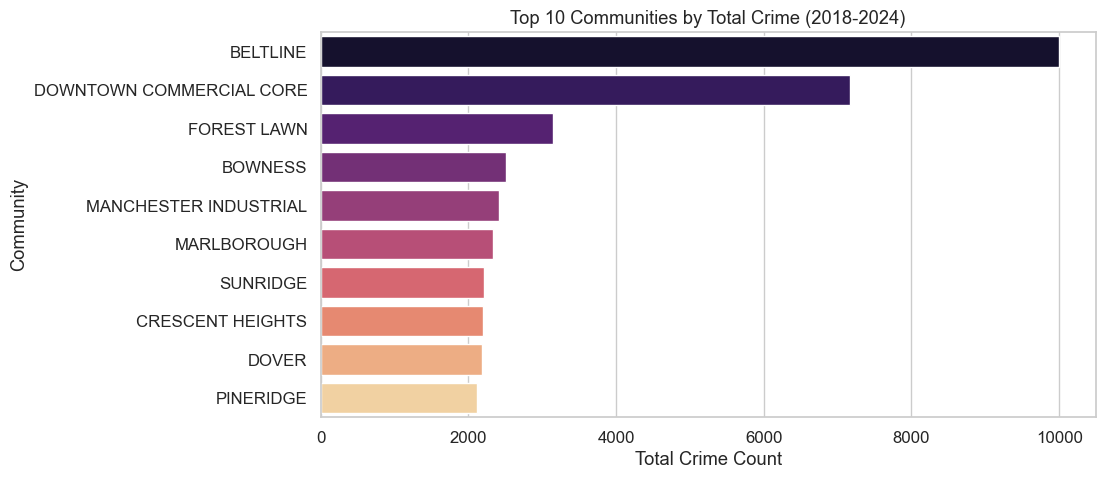

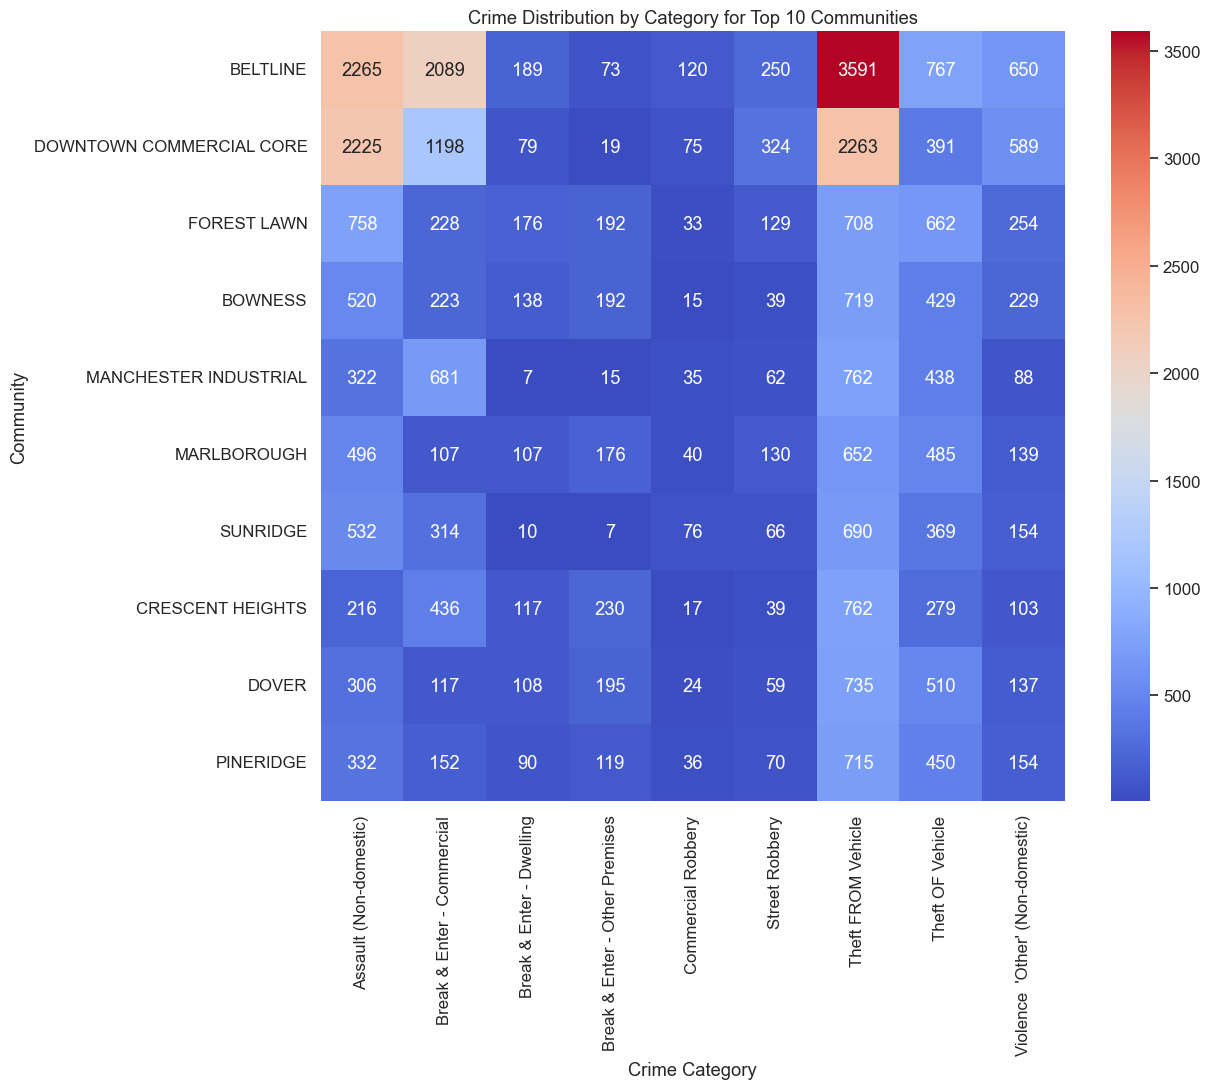

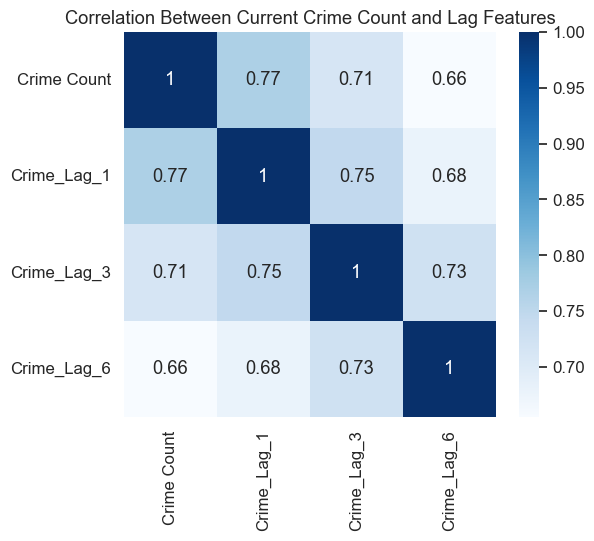

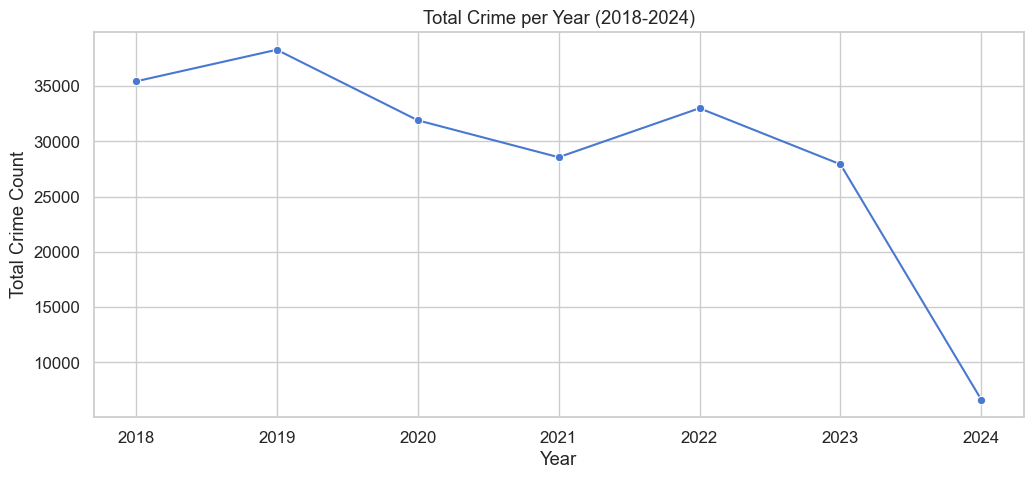

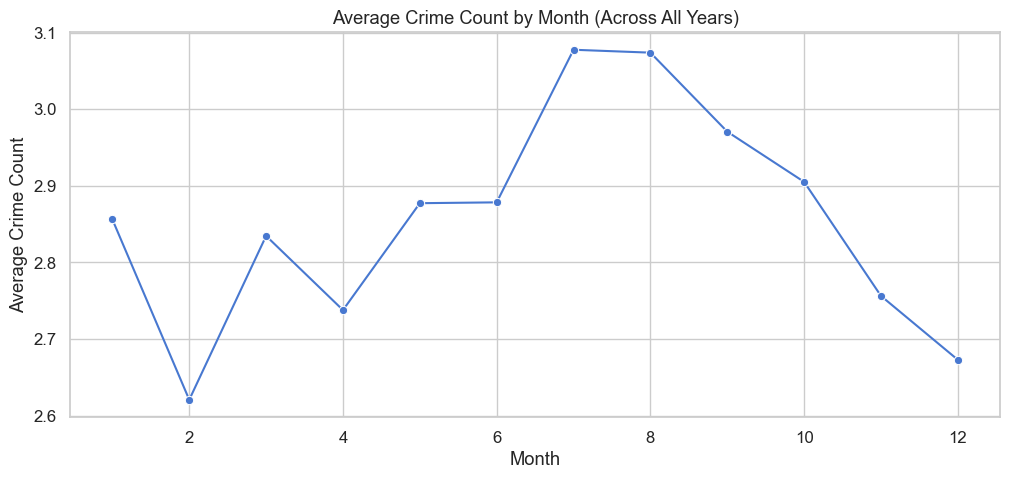

In [5]:
# Extended EDA: Community & Category Analysis

# 1. Top crime categories overall
plt.figure(figsize=(10,5))
category_counts = df.groupby('Category')['Crime Count'].sum().sort_values(ascending=False)
sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
plt.title("Total Crime Counts by Category (2018-2024)")
plt.xlabel("Total Crime Count")
plt.ylabel("Crime Category")
plt.show()

# 2. Top 10 communities by total crime
plt.figure(figsize=(10,5))
community_counts = df.groupby('Community')['Crime Count'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=community_counts.values, y=community_counts.index, palette="magma")
plt.title("Top 10 Communities by Total Crime (2018-2024)")
plt.xlabel("Total Crime Count")
plt.ylabel("Community")
plt.show()

# 3. Crime trends by Category and Community (heatmap)
# Aggregate data by Community and Category
community_category_pivot = df.pivot_table(index='Community', columns='Category', values='Crime Count', aggfunc='sum').fillna(0)
plt.figure(figsize=(12,10))
sns.heatmap(community_category_pivot.loc[community_counts.index], annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Crime Distribution by Category for Top 10 Communities")
plt.xlabel("Crime Category")
plt.ylabel("Community")
plt.show()

# 4. Correlation between lag features and current crime counts
lag_corr = data[['Crime Count', 'Crime_Lag_1', 'Crime_Lag_3', 'Crime_Lag_6']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(lag_corr, annot=True, cmap="Blues")
plt.title("Correlation Between Current Crime Count and Lag Features")
plt.show()

# 5. Crime trend by Year
plt.figure(figsize=(12,5))
yearly_crime = df.groupby('Year')['Crime Count'].sum()
sns.lineplot(x=yearly_crime.index, y=yearly_crime.values, marker='o')
plt.title("Total Crime per Year (2018-2024)")
plt.xlabel("Year")
plt.ylabel("Total Crime Count")
plt.show()

# 6. Month-wise seasonal trend across all years
plt.figure(figsize=(12,5))
monthly_avg = df.groupby('Month')['Crime Count'].mean()
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title("Average Crime Count by Month (Across All Years)")
plt.xlabel("Month")
plt.ylabel("Average Crime Count")
plt.show()


In [6]:
# Train-Validation-Test Split

# Sort data by Date to maintain time order
data = data.sort_values(by='Date').reset_index(drop=True)

# Split years: train (2018-2022), validation (2023), test (2024)
train_data = data[data['Year'] <= 2022]
val_data = data[data['Year'] == 2023]
test_data = data[data['Year'] == 2024]

# Features for the model
# Categorical inputs for embeddings
cat_features = ['Community_enc', 'Category_enc']

# Numeric inputs
num_features = ['Crime_Lag_1', 'Crime_Lag_3', 'Crime_Lag_6', 'Month_sin', 'Month_cos']

# Target
target = 'Crime Count'

# Prepare X and y for each set
X_train_cat = train_data[cat_features].values
X_train_num = train_data[num_features].values
y_train = train_data[target].values

X_val_cat = val_data[cat_features].values
X_val_num = val_data[num_features].values
y_val = val_data[target].values

X_test_cat = test_data[cat_features].values
X_test_num = test_data[num_features].values
y_test = test_data[target].values

print("Training set:", X_train_cat.shape, X_train_num.shape, y_train.shape)
print("Validation set:", X_val_cat.shape, X_val_num.shape, y_val.shape)
print("Test set:", X_test_cat.shape, X_test_num.shape, y_test.shape)


Training set: (56662, 2) (56662, 5) (56662,)
Validation set: (10918, 2) (10918, 5) (10918,)
Test set: (3081, 2) (3081, 5) (3081,)


In [7]:
# Neural Network Model Architecture
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Dense, Concatenate, Flatten, Dropout

# Define embedding input sizes
n_communities = data['Community_enc'].nunique()
n_categories = data['Category_enc'].nunique()
embedding_dim = 16  # can be tuned

# Categorical inputs
community_input = Input(shape=(1,), name='Community_Input')
community_emb = Embedding(input_dim=n_communities, output_dim=embedding_dim, name='Community_Emb')(community_input)
community_emb = Flatten()(community_emb)

category_input = Input(shape=(1,), name='Category_Input')
category_emb = Embedding(input_dim=n_categories, output_dim=embedding_dim, name='Category_Emb')(category_input)
category_emb = Flatten()(category_emb)

# Numeric inputs
numeric_input = Input(shape=(X_train_num.shape[1],), name='Numeric_Input')
x_num = Dense(32, activation='relu')(numeric_input)
x_num = Dropout(0.2)(x_num)

# Concatenate all branches
x = Concatenate()([community_emb, category_emb, x_num])
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation='linear', name='Crime_Prediction')(x)

# Build model
model = Model(inputs=[community_input, category_input, numeric_input], outputs=output)

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Community_Input (InputLayer)  │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Category_Input (InputLayer)   │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Numeric_Input (InputLayer)    │ (None, 5)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Community_Emb (Embedding)     │ (None, 1, 16)             │           4,736 │ Community_Input[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Category_Emb (Embedding)      │ (None, 1, 16)             │             144 │ Category_Input[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 32)                │             192 │ Numeric_Input[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 16)                │               0 │ Community_Emb[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_1 (Flatten)           │ (None, 16)                │               0 │ Category_Emb[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 32)                │               0 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 64)                │               0 │ flatten[0][0],             │
│                               │                           │                 │ flatten_1[0][0],           │
│                               │                           │                 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 64)                │           4,160 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 64)                │               0 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 32)                │           2,080 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Crime_Prediction (Dense)      │ (None, 1)                 │              33 │ dense_2[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 11,345 (44.32 KB)

 Trainable params: 11,345 (44.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


443/443 - 12s - 27ms/step - loss: 0.4283 - mae: 0.3898 - val_loss: 0.2439 - val_mae: 0.3120
Epoch 2/100
443/443 - 3s - 7ms/step - loss: 0.3654 - mae: 0.3657 - val_loss: 0.2452 - val_mae: 0.3166
Epoch 3/100
443/443 - 3s - 7ms/step - loss: 0.3530 - mae: 0.3600 - val_loss: 0.2514 - val_mae: 0.3175
Epoch 4/100
443/443 - 6s - 13ms/step - loss: 0.3508 - mae: 0.3581 - val_loss: 0.2453 - val_mae: 0.3201
Epoch 5/100


443/443 - 4s - 8ms/step - loss: 0.3463 - mae: 0.3564 - val_loss: 0.2422 - val_mae: 0.3191
Epoch 6/100
443/443 - 3s - 8ms/step - loss: 0.3449 - mae: 0.3543 - val_loss: 0.2501 - val_mae: 0.3217
Epoch 7/100
443/443 - 3s - 8ms/step - loss: 0.3369 - mae: 0.3520 - val_loss: 0.2441 - val_mae: 0.3178
Epoch 8/100
443/443 - 3s - 7ms/step - loss: 0.3350 - mae: 0.3500 - val_loss: 0.2429 - val_mae: 0.3171
Epoch 9/100
443/443 - 3s - 8ms/step - loss: 0.3291 - mae: 0.3491 - val_loss: 0.2473 - val_mae: 0.3183
Epoch 10/100
443/443 - 6s - 13ms/step - loss: 0.3313 - mae: 0.3488 - val_loss: 0.2451 - val_mae: 0.3213
Epoch 11/100
443/443 - 4s - 8ms/step - loss: 0.3231 - mae: 0.3467 - val_loss: 0.2435 - val_mae: 0.3218
Epoch 12/100
443/443 - 5s - 12ms/step - loss: 0.3266 - mae: 0.3456 - val_loss: 0.2459 - val_mae: 0.3229
Epoch 13/100
443/443 - 3s - 8ms/step - loss: 0.3247 - mae: 0.3455 - val_loss: 0.2437 - val_mae: 0.3194
Epoch 14/100
443/443 - 4s - 8ms/step - loss: 0.3124 - mae: 0.3439 - val_loss: 0.2439 - v

443/443 - 6s - 14ms/step - loss: 0.3184 - mae: 0.3442 - val_loss: 0.2422 - val_mae: 0.3186
Epoch 16/100
443/443 - 4s - 9ms/step - loss: 0.3165 - mae: 0.3438 - val_loss: 0.2505 - val_mae: 0.3244
Epoch 17/100
443/443 - 4s - 8ms/step - loss: 0.3176 - mae: 0.3427 - val_loss: 0.2467 - val_mae: 0.3241
Epoch 18/100
443/443 - 3s - 8ms/step - loss: 0.3166 - mae: 0.3429 - val_loss: 0.2466 - val_mae: 0.3229
Epoch 19/100
443/443 - 3s - 7ms/step - loss: 0.3122 - mae: 0.3418 - val_loss: 0.2484 - val_mae: 0.3230
Epoch 20/100
443/443 - 6s - 13ms/step - loss: 0.3085 - mae: 0.3405 - val_loss: 0.2454 - val_mae: 0.3211
Epoch 21/100
443/443 - 5s - 11ms/step - loss: 0.3202 - mae: 0.3415 - val_loss: 0.2492 - val_mae: 0.3237
Epoch 22/100
443/443 - 3s - 8ms/step - loss: 0.3092 - mae: 0.3410 - val_loss: 0.2471 - val_mae: 0.3215
Epoch 23/100
443/443 - 3s - 8ms/step - loss: 0.3084 - mae: 0.3410 - val_loss: 0.2465 - val_mae: 0.3219
Epoch 24/100
443/443 - 3s - 8ms/step - loss: 0.3101 - mae: 0.3409 - val_loss: 0.247

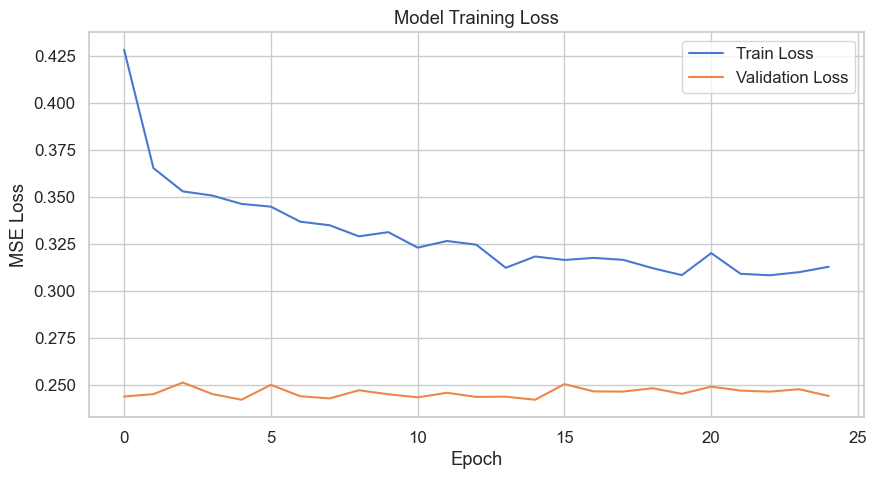

In [8]:
# Model Training

# Early stopping and checkpoint
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('crime_model_best.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    x=[X_train_cat[:,0], X_train_cat[:,1], X_train_num],
    y=y_train,
    validation_data=([X_val_cat[:,0], X_val_cat[:,1], X_val_num], y_val),
    epochs=100,
    batch_size=128,
    callbacks=[early_stop, checkpoint],
    verbose=2
)

# Plot training history
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step   
Test MAE: 0.3315
Test RMSE: 0.4908


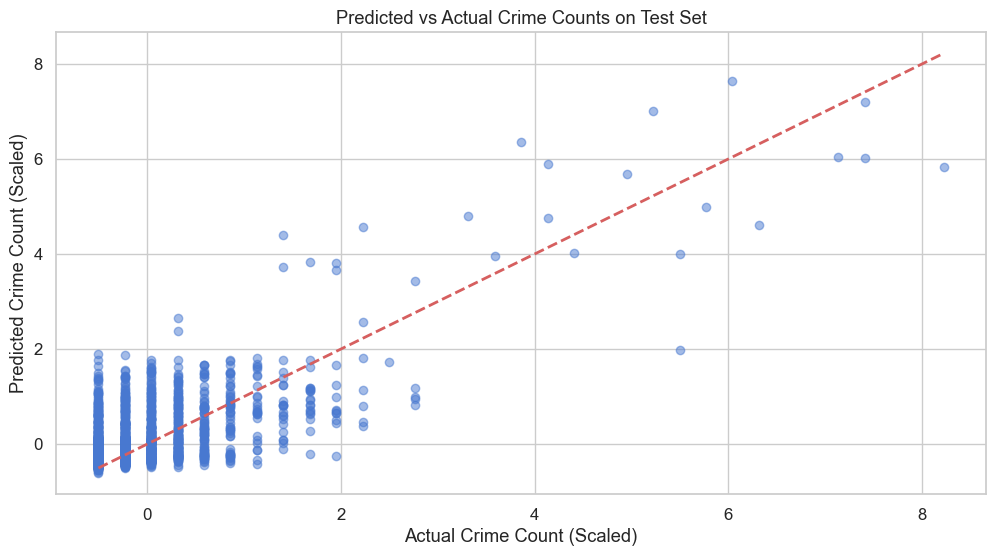

No data found for 01B - Assault (Non-domestic) in the test set.


In [10]:
# Safe Test Set Evaluation & Visualization

# Predict on test set
y_pred = model.predict([X_test_cat[:,0], X_test_cat[:,1], X_test_num])

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")

# Plot predictions vs actual
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Crime Count (Scaled)")
plt.ylabel("Predicted Crime Count (Scaled)")
plt.title("Predicted vs Actual Crime Counts on Test Set")
plt.show()

# Optional: Time series comparison for a sample community-category
sample_community = '01B'
sample_category = 'Assault (Non-domestic)'

sample = test_data[(test_data['Community']==sample_community) & 
                   (test_data['Category']==sample_category)]

if len(sample) > 0:
    sample_indices = sample.index
    sample_pred = model.predict([
        X_test_cat[sample_indices,0],
        X_test_cat[sample_indices,1],
        X_test_num[sample_indices]
    ])
    plt.figure(figsize=(12,5))
    plt.plot(sample['Date'], sample['Crime Count'], label='Actual')
    plt.plot(sample['Date'], sample_pred, label='Predicted')
    plt.xlabel("Date")
    plt.ylabel("Crime Count (Scaled)")
    plt.title(f"Predicted vs Actual Crime Counts for {sample_community} - {sample_category}")
    plt.legend()
    plt.show()
else:
    print(f"No data found for {sample_community} - {sample_category} in the test set.")


In [11]:
# Save Trained Model

# Save the model in native Keras format
model.save('crime_prediction_model.keras')

print("Model saved successfully as 'crime_prediction_model.keras'")


Model saved successfully as 'crime_prediction_model.keras'


In [12]:
from tensorflow.keras.models import load_model

loaded_model = load_model('crime_prediction_model.keras')


C:\Users\AKINMADE FARUQ\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [13]:
model.save('crime_prediction_model.keras', include_optimizer=False)
print("Model saved successfully as 'crime_prediction_model.keras'")

Model saved successfully as 'crime_prediction_model.keras'


In [14]:
from tensorflow.keras.models import load_model

loaded_model = load_model('crime_prediction_model.keras')
